### Summarizing data with PCA

This activity is meant to explore the results of applying PCA to a dataset.  Below, a dataset from a credit card company is loaded and displayed.  This dataset contains customer data pertaining to demographic and payment information as well as basic demographics.  The final column `default payment next month` is what we want to create profiles for.  

You are to use PCA and reduce the dimensionality of the data to 2 and 3 dimensions.  Then, draw scatterplots of the resulting data and color them by `default`.  Does it seem that 2 or 3 principal components will seperate the data into clear groups?  Why or why not?  You should post your visualizations and argument for whether the components offer more succinct data representations on the discussion board for this activity.  (Note: In this assignment you should use the sklearn version of `PCA`.)

In [230]:
import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.linalg import svd

In [231]:
default = pd.read_csv('data/credit.csv', index_col=0)

In [232]:
default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [233]:
default.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1     20000.0    2          2         1   24      2      2     -1     -1   
2    120000.0    2          2         2   26     -1      2      0      0   
3     90000.0    2          2         2   34      0      0      0      0   
4     50000.0    2          2         1   37      0      0      0      0   
5     50000.0    1          2         1   57     -1      0     -1      0   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID         ...                                                                  
1      -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
2       0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
3       0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
4       0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
5       0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
ID                                                            
1        0.0       0.0       0.0                           1  
2     1000.0       0.0    2000.0                           1  
3     1000.0    1000.0    5000.0                           0  
4     1100.0    1069.0    1000.0                           0  
5     9000.0     689.0     679.0                           0  

[5 rows x 24 columns]

##### Plotting in 3D

Below, example plots are made with both `matplotlib` and with `plotly` to demonstrate how to construct three dimensional plots.  

`matplotlib`

In `matplotlib` an `axes` object is created where the projection is specified as '3d'.  Then, the `axes` are use to plot a 3D object on.  Below, a scatter plot is built, but there are many 3D objects that can be created in addition to points.  For more information see the documentation on 3D plotting [here](https://matplotlib.org/stable/api/toolkits/mplot3d.html?highlight=3d).


`plotly`

Use the `scatter_3d` function directly.

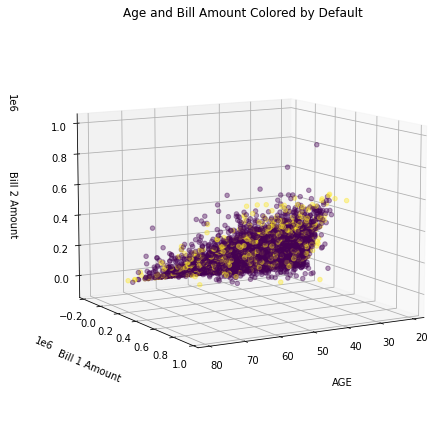

In [234]:
plt.figure(figsize = (6,6))
ax = plt.axes(projection = '3d')
ax.scatter3D(default['AGE'], default['BILL_AMT1'], default['BILL_AMT2'], c = default['default.payment.next.month'], alpha = 0.4)
ax.set_xlabel('AGE', labelpad = 20)
ax.set_ylabel('Bill 1 Amount', labelpad = 20)
ax.set_zlabel('Bill 2 Amount', labelpad = 20)
ax.view_init(10, 60)
plt.title('Age and Bill Amount Colored by Default')
plt.tight_layout();

In [235]:
px.scatter_3d(data_frame=default, x = 'AGE', y = 'BILL_AMT1', z = 'BILL_AMT2', color = default['default.payment.next.month'])

In [236]:
default
#df = default.drop(["default.payment.next.month"],  axis = 1)
#df = df.values

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1        20000.0    2          2         1   24      2      2     -1     -1   
2       120000.0    2          2         2   26     -1      2      0      0   
3        90000.0    2          2         2   34      0      0      0      0   
4        50000.0    2          2         1   37      0      0      0      0   
5        50000.0    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29996   220000.0    1          3         1   39      0      0      0      0   
29997   150000.0    1          3         2   43     -1     -1     -1     -1   
29998    30000.0    1          2         2   37      4      3      2     -1   
29999    80000.0    1          3         1   41      1     -1      0      0   
30000    50000.0    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
1         -2  ...        0.0        0.0        0.0       0.0     689.0   
2          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
3          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
4          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
5          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29996      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29997      0  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29998      0  ...    20878.0    20582.0    19357.0       0.0       0.0   
29999      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
30000      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
ID                                                                         
1           0.0       0.0       0.0       0.0                           1  
2        1000.0    1000.0       0.0    2000.0                           1  
3        1000.0    1000.0    1000.0    5000.0                           0  
4        1200.0    1100.0    1069.0    1000.0                           0  
5       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29996    5003.0    3047.0    5000.0    1000.0                           0  
29997    8998.0     129.0       0.0       0.0                           0  
29998   22000.0    4200.0    2000.0    3100.0                           1  
29999    1178.0    1926.0   52964.0    1804.0                           1  
30000    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 24 columns]

In [237]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 23, svd_solver= 'full')
pca.fit(default)

PCA(n_components=23, svd_solver='full')

In [238]:
ind_variance = (pca.explained_variance_ratio_*100)
ind_variance

array([6.10437013e+01, 2.95353813e+01, 3.05241925e+00, 1.69285926e+00,
       9.42041926e-01, 9.04174545e-01, 7.54445790e-01, 6.38481379e-01,
       5.83708771e-01, 2.96671412e-01, 2.38506002e-01, 1.69774353e-01,
       1.47834530e-01, 1.83162817e-07, 9.40057796e-09, 1.95299836e-09,
       1.24867269e-09, 1.18143326e-09, 7.84014331e-10, 5.77721302e-10,
       5.37284257e-10, 4.65631996e-10, 3.85845883e-10])

In [239]:
cumsum_variance = np.cumsum(pca.explained_variance_ratio_*100)
cumsum_variance

array([ 61.04370131,  90.57908258,  93.63150183,  95.32436109,
        96.26640302,  97.17057756,  97.92502335,  98.56350473,
        99.1472135 ,  99.44388491,  99.68239092,  99.85216527,
        99.9999998 ,  99.99999998,  99.99999999,  99.99999999,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        ])

Text(0.5, 1.0, 'Without Standardization')

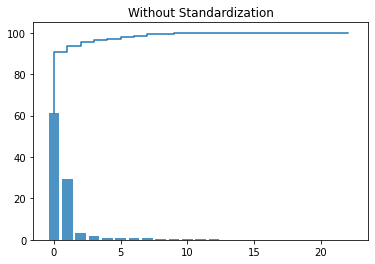

In [373]:
plt.bar(range(0,len(ind_variance)),ind_variance, alpha = 0.8)
plt.step(range(0,len(cumsum_variance)), cumsum_variance)
plt.title("Without Standardization")

In [242]:
scaler = StandardScaler()

In [245]:
standardized_df = scaler.fit_transform(df)
standardized_df

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [246]:
pca = PCA(n_components= 23)
pca.fit(default_norm)
ind_variance2 = (pca.explained_variance_ratio_*100)

cumsum_variance2 = np.cumsum(pca.explained_variance_ratio_*100)
ind_variance2
cumsum_variance2


array([27.2986001 , 44.80492533, 51.27577848, 57.42304643, 61.75831596,
       65.81849281, 69.63531464, 73.41442996, 77.10699531, 80.73719021,
       83.9990889 , 87.05030652, 89.66671189, 92.03972115, 94.22461938,
       95.88200863, 96.96378955, 98.00046856, 98.78660924, 99.33569114,
       99.62797426, 99.79786438, 99.9032595 ])

In [247]:
ind_variance2

array([27.2986001 , 17.50632523,  6.47085314,  6.14726795,  4.33526954,
        4.06017685,  3.81682183,  3.77911532,  3.69256534,  3.6301949 ,
        3.26189869,  3.05121762,  2.61640537,  2.37300926,  2.18489823,
        1.65738925,  1.08178092,  1.03667901,  0.78614068,  0.54908191,
        0.29228311,  0.16989012,  0.10539512])

Text(0.5, 1.0, 'With Standardized Data')

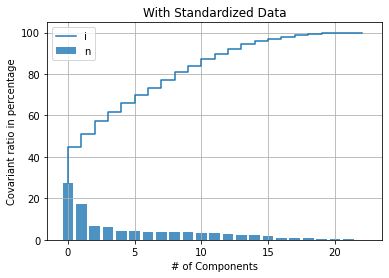

In [374]:
plt.bar(range(0,len(ind_variance2)),ind_variance2, alpha = 0.8)
plt.step(range(0,len(cumsum_variance2)), cumsum_variance2)
plt.xlabel ("# of Components" )
plt.ylabel("Covariant ratio in percentage")
plt.legend( "ind_variance2"  ,loc ='best')
plt.grid()
plt.title("With Standardized Data")

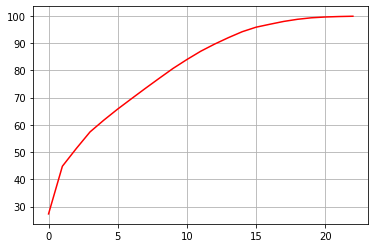

In [249]:
plt.plot(range(0,len(cumsum_variance2)), cumsum_variance2, color = 'red')
plt.grid()

In [375]:

for i in range(0 , len(ind_variance2)):
    print(" Covariant ratio for component", i, "is", ind_variance2[i] ) 

 Covariant ratio for component 0 is 27.298600103654415
 Covariant ratio for component 1 is 17.506325228723682
 Covariant ratio for component 2 is 6.470853144463777
 Covariant ratio for component 3 is 6.147267952024599
 Covariant ratio for component 4 is 4.335269535648591
 Covariant ratio for component 5 is 4.060176848471304
 Covariant ratio for component 6 is 3.8168218268879137
 Covariant ratio for component 7 is 3.779115323345525
 Covariant ratio for component 8 is 3.6925653447397657
 Covariant ratio for component 9 is 3.630194900140535
 Covariant ratio for component 10 is 3.261898689266728
 Covariant ratio for component 11 is 3.051217619742882
 Covariant ratio for component 12 is 2.616405374918931
 Covariant ratio for component 13 is 2.3730092598393435
 Covariant ratio for component 14 is 2.184898232682856
 Covariant ratio for component 15 is 1.6573892461007915
 Covariant ratio for component 16 is 1.081780920077634
 Covariant ratio for component 17 is 1.0366790086874211
 Covariant ra

In [376]:
for i in range(0 , len(ind_variance2)):  
    print("Cummulative Covariant ratio for component",  i, "is", cumsum_variance2[i] )
    

Cummulative Covariant ratio for component 0 is 27.298600103654415
Cummulative Covariant ratio for component 1 is 44.8049253323781
Cummulative Covariant ratio for component 2 is 51.27577847684187
Cummulative Covariant ratio for component 3 is 57.42304642886647
Cummulative Covariant ratio for component 4 is 61.75831596451506
Cummulative Covariant ratio for component 5 is 65.81849281298636
Cummulative Covariant ratio for component 6 is 69.63531463987428
Cummulative Covariant ratio for component 7 is 73.4144299632198
Cummulative Covariant ratio for component 8 is 77.10699530795956
Cummulative Covariant ratio for component 9 is 80.7371902081001
Cummulative Covariant ratio for component 10 is 83.99908889736683
Cummulative Covariant ratio for component 11 is 87.05030651710972
Cummulative Covariant ratio for component 12 is 89.66671189202864
Cummulative Covariant ratio for component 13 is 92.039721151868
Cummulative Covariant ratio for component 14 is 94.22461938455085
Cummulative Covariant ra

In [252]:
default

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1        20000.0    2          2         1   24      2      2     -1     -1   
2       120000.0    2          2         2   26     -1      2      0      0   
3        90000.0    2          2         2   34      0      0      0      0   
4        50000.0    2          2         1   37      0      0      0      0   
5        50000.0    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29996   220000.0    1          3         1   39      0      0      0      0   
29997   150000.0    1          3         2   43     -1     -1     -1     -1   
29998    30000.0    1          2         2   37      4      3      2     -1   
29999    80000.0    1          3         1   41      1     -1      0      0   
30000    50000.0    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
1         -2  ...        0.0        0.0        0.0       0.0     689.0   
2          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
3          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
4          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
5          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29996      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29997      0  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29998      0  ...    20878.0    20582.0    19357.0       0.0       0.0   
29999      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
30000      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
ID                                                                         
1           0.0       0.0       0.0       0.0                           1  
2        1000.0    1000.0       0.0    2000.0                           1  
3        1000.0    1000.0    1000.0    5000.0                           0  
4        1200.0    1100.0    1069.0    1000.0                           0  
5       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29996    5003.0    3047.0    5000.0    1000.0                           0  
29997    8998.0     129.0       0.0       0.0                           0  
29998   22000.0    4200.0    2000.0    3100.0                           1  
29999    1178.0    1926.0   52964.0    1804.0                           1  
30000    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 24 columns]

In [272]:
# Applying 2 components for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(default)
df1

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.31413612,
        -0.29338206,  1.87637834],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.31413612,
        -0.18087821,  1.87637834],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24868274,
        -0.01212243, -0.53294156],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.18322937,
        -0.11900109,  1.87637834],
       [-0.67427636, -1.23432296,  1.45111372, ...,  3.15253642,
        -0.19190359,  1.87637834],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24868274,
        -0.23713013,  1.87637834]])

<AxesSubplot:>

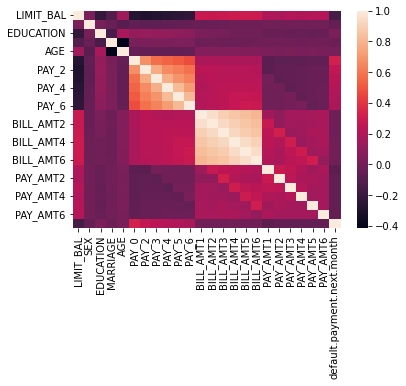

In [371]:
sns.heatmap(default.corr())

In [310]:
pca = PCA(n_components = 2, svd_solver = 'full', random_state= 0)
df_pca2 = pca.fit(df1)
pca2_transformed = pca.transform(df1)
df2_pca2 = pd.DataFrame(pca2_transformed)
df2_pca2['default.payment.next.month'] = default['default.payment.next.month']
df2_pca2

0         1  default.payment.next.month
0     -1.800973 -1.270393                         NaN
1     -0.671428 -2.406269                         1.0
2     -0.858546 -0.969766                         1.0
3     -0.210006 -0.706131                         0.0
4     -0.860082  0.002982                         0.0
...         ...       ...                         ...
29995  2.493682  0.815896                         1.0
29996 -1.795120  0.020810                         0.0
29997  0.465992 -3.609630                         0.0
29998  0.718826  0.383663                         1.0
29999 -0.062562 -1.136034                         1.0

[30000 rows x 3 columns]

<AxesSubplot:xlabel='0', ylabel='1'>

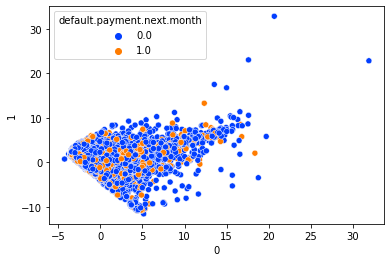

In [314]:
sns.scatterplot(x = (df2_pca2[0]), y = df2_pca2[1], hue= default['default.payment.next.month'],palette = 'bright' )

In [312]:
pca = PCA(n_components = 3, svd_solver = 'full', random_state= 0)
df_pca3 = pca.fit(df1)
pca3_transformed = pca.transform(df1)
df3_pca3 = pd.DataFrame(pca3_transformed)
df3_pca3['default.payment.next.month'] = default['default.payment.next.month']
df3_pca3

0         1         2  default.payment.next.month
0     -1.800973 -1.270393 -0.590286                         NaN
1     -0.671428 -2.406269  1.040739                         1.0
2     -0.858546 -0.969766  0.470753                         1.0
3     -0.210006 -0.706131 -0.782280                         0.0
4     -0.860082  0.002982 -1.041115                         0.0
...         ...       ...       ...                         ...
29995  2.493682  0.815896 -1.635671                         1.0
29996 -1.795120  0.020810 -0.392404                         0.0
29997  0.465992 -3.609630  0.500568                         0.0
29998  0.718826  0.383663  0.323232                         1.0
29999 -0.062562 -1.136034 -1.445067                         1.0

[30000 rows x 4 columns]

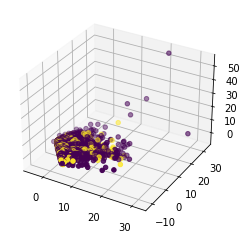

In [320]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
xline = df3_pca3[0]
yline = df3_pca3[1]
zline = df3_pca3[2]
ax.scatter3D(xline, yline, zline, c = df3_pca3['default.payment.next.month'])

In [358]:
df3_pca3.head()
#df3_pca3 =  df3_pca3.drop(columns= ['PCA_1', 'PCA_2'])
df3_pca3 = df3_pca3.rename(columns = {0: 'PCA_1', 1: "PCA_2", 2: "PCA_3"})
#df3_pca3['PCA_1'] = df3_pca3[1]
#df3_pca3[1].rename('PCA1')

df3_pca3
px.scatter_3d(df3_pca3, x = 'PCA_1', y = 'PCA_2', z = 'PCA_3', color= 'default.payment.next.month')